#### Import the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

#### Load the dataset

In [2]:
covid_df = pd.read_csv('covid_19_india.csv')
covid_df.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3


#### Display data information

In [3]:
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18110 entries, 0 to 18109
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Sno                       18110 non-null  int64 
 1   Date                      18110 non-null  object
 2   Time                      18110 non-null  object
 3   State/UnionTerritory      18110 non-null  object
 4   ConfirmedIndianNational   18110 non-null  object
 5   ConfirmedForeignNational  18110 non-null  object
 6   Cured                     18110 non-null  int64 
 7   Deaths                    18110 non-null  int64 
 8   Confirmed                 18110 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 1.2+ MB


#### Check for null values

In [4]:
covid_df.isnull().sum()

Sno                         0
Date                        0
Time                        0
State/UnionTerritory        0
ConfirmedIndianNational     0
ConfirmedForeignNational    0
Cured                       0
Deaths                      0
Confirmed                   0
dtype: int64

#### Check for duplicates

In [5]:
covid_df.duplicated().sum()

np.int64(0)

#### Drop unnecessary columns

In [6]:
covid_df.drop(['Sno', 'ConfirmedIndianNational', 'ConfirmedForeignNational'], axis = 1, inplace = True)

#### Add a new column named 'active'

In [7]:
covid_df['Active'] = covid_df['Confirmed'] - (covid_df['Cured'] + covid_df['Deaths'])

#### Rename 'State/UnionTerritory' column

In [8]:
covid_df.rename(columns = {'State/UnionTerritory' : 'State'}, inplace = True)

#### Generate descriptive statistics 

In [9]:
covid_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Cured,18110.0,278637.518056,614890.894424,0.0,3360.25,33364.0,278869.75,6159676.0
Deaths,18110.0,4052.402264,10919.076411,0.0,32.00,588.0,3643.75,134201.0
Confirmed,18110.0,301031.401822,656148.872965,0.0,4376.75,39773.5,300149.75,6363442.0
Active,18110.0,18341.481502,52896.528487,-9368.0,322.00,2305.5,12454.75,701614.0


#### Change 'Date' column from object format to datetime format

In [10]:
covid_df['Date']

0        2020-01-30
1        2020-01-31
2        2020-02-01
3        2020-02-02
4        2020-02-03
            ...    
18105    2021-08-11
18106    2021-08-11
18107    2021-08-11
18108    2021-08-11
18109    2021-08-11
Name: Date, Length: 18110, dtype: object

In [11]:
covid_df['Date'] = pd.to_datetime(covid_df['Date'], format = '%Y-%m-%d')

In [12]:
covid_df['Date']

0       2020-01-30
1       2020-01-31
2       2020-02-01
3       2020-02-02
4       2020-02-03
           ...    
18105   2021-08-11
18106   2021-08-11
18107   2021-08-11
18108   2021-08-11
18109   2021-08-11
Name: Date, Length: 18110, dtype: datetime64[ns]

#### Calculate total confirmed cases

In [13]:
covid_df['Confirmed']

0              1
1              1
2              2
3              3
4              3
          ...   
18105     650353
18106      80660
18107     342462
18108    1708812
18109    1534999
Name: Confirmed, Length: 18110, dtype: int64

In [14]:
covid_df['Confirmed'].nunique()

14971

In [15]:
covid_df['Confirmed'].head(30)

0     1
1     1
2     2
3     3
4     3
5     3
6     3
7     3
8     3
9     3
10    3
11    3
12    3
13    3
14    3
15    3
16    3
17    3
18    3
19    3
20    3
21    3
22    3
23    3
24    3
25    3
26    3
27    3
28    3
29    3
Name: Confirmed, dtype: int64

In [16]:
np.sum(covid_df['Confirmed'])

np.int64(5451678687)

#### Calculate total deaths cases

In [17]:
np.sum(covid_df['Deaths'])

np.int64(73389005)

#### Calculate total cured cases

In [18]:
np.sum(covid_df['Cured'])

np.int64(5046125452)

#### Calculate total active cases

In [19]:
np.sum(covid_df['Active'])

np.int64(332164230)

#### Create a pivot table

In [20]:
statewise = pd.pivot_table(covid_df, values = ['Confirmed', 'Cured', 'Deaths'],  index = 'State', aggfunc = max)

C:\Users\SAUGAT\AppData\Local\Temp\ipykernel_24476\816149342.py:1: FutureWarning: The provided callable <built-in function max> is currently using DataFrameGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  statewise = pd.pivot_table(covid_df, values = ['Confirmed', 'Cured', 'Deaths'],  index = 'State', aggfunc = max)


In [21]:
statewise

,Confirmed,Cured,Deaths
State,,,
Andaman and Nicobar Islands,7548,7412,129
Andhra Pradesh,1985182,1952736,13564
Arunachal Pradesh,50605,47821,248
Assam,576149,559684,5420
Bihar,725279,715352,9646
Bihar****,715730,701234,9452
Cases being reassigned to states,9265,0,0
Chandigarh,61992,61150,811
Chhattisgarh,1003356,988189,13544


#### Add a new columns to the pivot table named 'Recovery Rate' and Mortality Rate'

In [22]:
statewise['Recovery Rate'] = statewise['Cured']/statewise['Confirmed']*100
statewise['Mortality Rate'] = statewise['Deaths']/statewise['Confirmed']*100

In [23]:
statewise

,Confirmed,Cured,Deaths,Recovery Rate,Mortality Rate
State,,,,,
Andaman and Nicobar Islands,7548,7412,129,98.198198,1.709062
Andhra Pradesh,1985182,1952736,13564,98.365591,0.683262
Arunachal Pradesh,50605,47821,248,94.498567,0.490070
Assam,576149,559684,5420,97.142232,0.940729
Bihar,725279,715352,9646,98.631285,1.329971
Bihar****,715730,701234,9452,97.974655,1.320610
Cases being reassigned to states,9265,0,0,0.000000,0.000000
Chandigarh,61992,61150,811,98.641760,1.308233
Chhattisgarh,1003356,988189,13544,98.488373,1.349870


#### Sort the data

In [24]:
statewise = statewise.sort_values(by = 'Confirmed', ascending = False)

In [25]:
statewise

,Confirmed,Cured,Deaths,Recovery Rate,Mortality Rate
State,,,,,
Maharashtra,6363442,6159676,134201,96.797865,2.108937
Maharashtra***,6229596,6000911,130753,96.329056,2.098900
Kerala,3586693,3396184,18004,94.688450,0.501967
Karnataka,2921049,2861499,36848,97.961349,1.261465
Karanataka,2885238,2821491,36197,97.790581,1.254559
Tamil Nadu,2579130,2524400,34367,97.877967,1.332504
Andhra Pradesh,1985182,1952736,13564,98.365591,0.683262
Uttar Pradesh,1708812,1685492,22775,98.635309,1.332797
West Bengal,1534999,1506532,18252,98.145471,1.189056


#### Color cells based on the values they contain using a gradient

In [26]:
statewise.style.background_gradient(cmap = 'cubehelix')

,Confirmed,Cured,Deaths,Recovery Rate,Mortality Rate
State,,,,,
Maharashtra,6363442,6159676,134201,96.797865,2.108937
Maharashtra***,6229596,6000911,130753,96.329056,2.098900
Kerala,3586693,3396184,18004,94.688450,0.501967
Karnataka,2921049,2861499,36848,97.961349,1.261465
Karanataka,2885238,2821491,36197,97.790581,1.254559
Tamil Nadu,2579130,2524400,34367,97.877967,1.332504
Andhra Pradesh,1985182,1952736,13564,98.365591,0.683262
Uttar Pradesh,1708812,1685492,22775,98.635309,1.332797
West Bengal,1534999,1506532,18252,98.145471,1.189056


#### Group the data based on the 'State' column and sort it based on the 'Active' column within each group

In [27]:
top_active = covid_df.groupby(by = 'State').max()[['Active', 'Date']].sort_values(by = 'Active', ascending = False).reset_index()

In [28]:
covid_df.groupby(by = 'State').max()

,Date,Time,Cured,Deaths,Confirmed,Active
State,,,,,,
Andaman and Nicobar Islands,2021-08-11,9:30 PM,7412,129,7548,1154
Andhra Pradesh,2021-08-11,9:30 PM,1952736,13564,1985182,211554
Arunachal Pradesh,2021-08-11,8:00 AM,47821,248,50605,4465
Assam,2021-08-11,8:00 AM,559684,5420,576149,56295
Bihar,2021-08-11,9:30 PM,715352,9646,725279,115152
Bihar****,2021-06-11,8:00 AM,701234,9452,715730,5044
Cases being reassigned to states,2020-07-18,8:00 AM,0,0,9265,9265
Chandigarh,2021-08-11,9:30 PM,61150,811,61992,8653
Chhattisgarh,2021-08-11,9:30 PM,988189,13544,1003356,131245


In [29]:
top_active

,State,Active,Date
0,Maharashtra,701614,2021-08-11
1,Karnataka,605515,2021-08-11
2,Kerala,445692,2021-08-11
3,Tamil Nadu,313048,2021-08-11
4,Uttar Pradesh,310783,2021-08-11
5,Rajasthan,212753,2021-08-11
6,Andhra Pradesh,211554,2021-08-11
7,Gujarat,148297,2021-08-11
8,West Bengal,132181,2021-08-11
9,Chhattisgarh,131245,2021-08-11


#### 1. Creates a bar plot to visualize the top 10 states with the most active COVID-19 cases

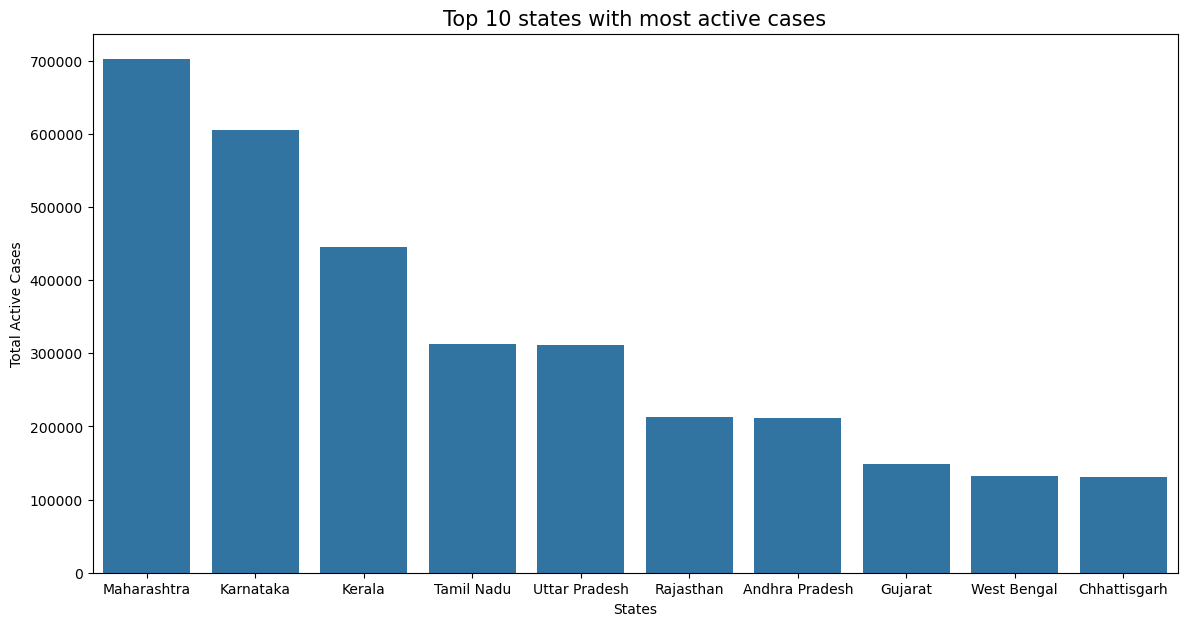

In [30]:
plt.figure(figsize = (14,7))
plt.title('Top 10 states with most active cases', size = 15)
sns.barplot(data = top_active.iloc[:10], y = 'Active', x = 'State')
plt.xlabel('States')
plt.ylabel('Total Active Cases')
plt.show()

#### Group the data based on the 'State' column and sort it based on the 'Deaths' column within each group

In [31]:
top_death = covid_df.groupby(by = 'State').max()[['Deaths', 'Date']].sort_values(by = 'Deaths', ascending = False).reset_index()

In [32]:
top_death

,State,Deaths,Date
0,Maharashtra,134201,2021-08-11
1,Maharashtra***,130753,2021-07-21
2,Karnataka,36848,2021-08-11
3,Karanataka,36197,2021-07-20
4,Tamil Nadu,34367,2021-08-11
5,Delhi,25068,2021-08-11
6,Uttar Pradesh,22775,2021-08-11
7,West Bengal,18252,2021-08-11
8,Kerala,18004,2021-08-11
9,Punjab,16322,2021-08-11


#### 2. Create a bar plot to visualize the top 10 states with the most COVID-19 deaths

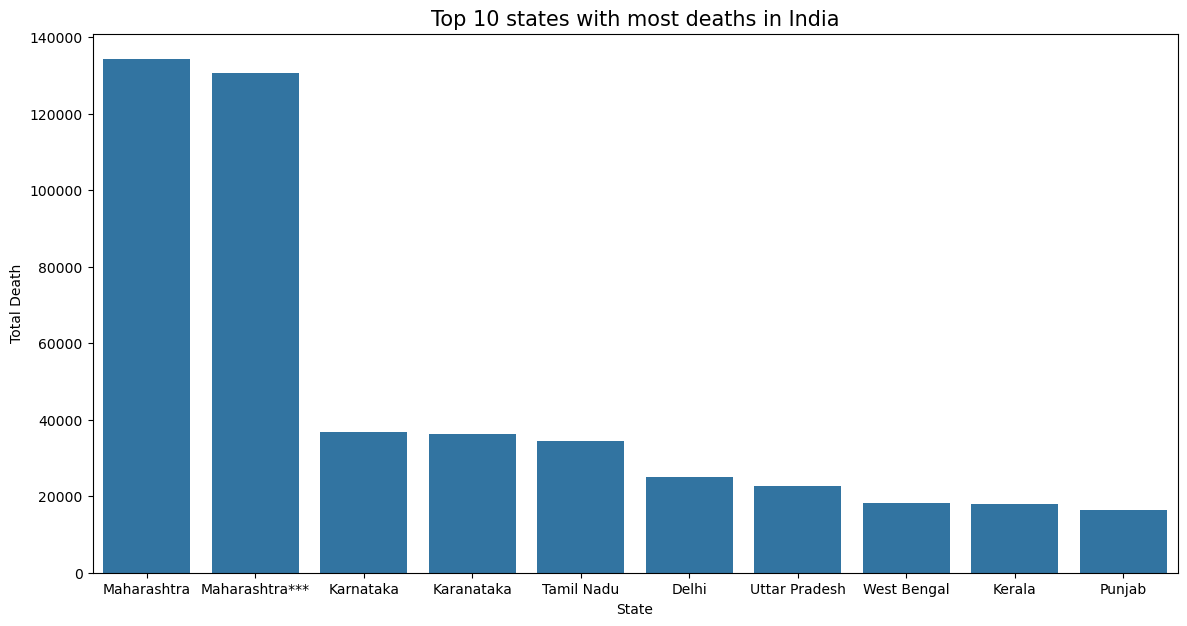

In [33]:
plt.figure(figsize = (14,7))
plt.title('Top 10 states with most deaths in India', size = 15)
sns.barplot(data = top_death.iloc[:10], x = 'State', y = 'Deaths')
plt.xlabel('State')
plt.ylabel('Total Death')
plt.show()

#### 3. Creates a line plot to visualize the trend of active COVID-19 cases over time for the top 5 affected states (Maharashtra, Karnataka, Kerala, Tamil Nadu, and Uttar Pradesh)

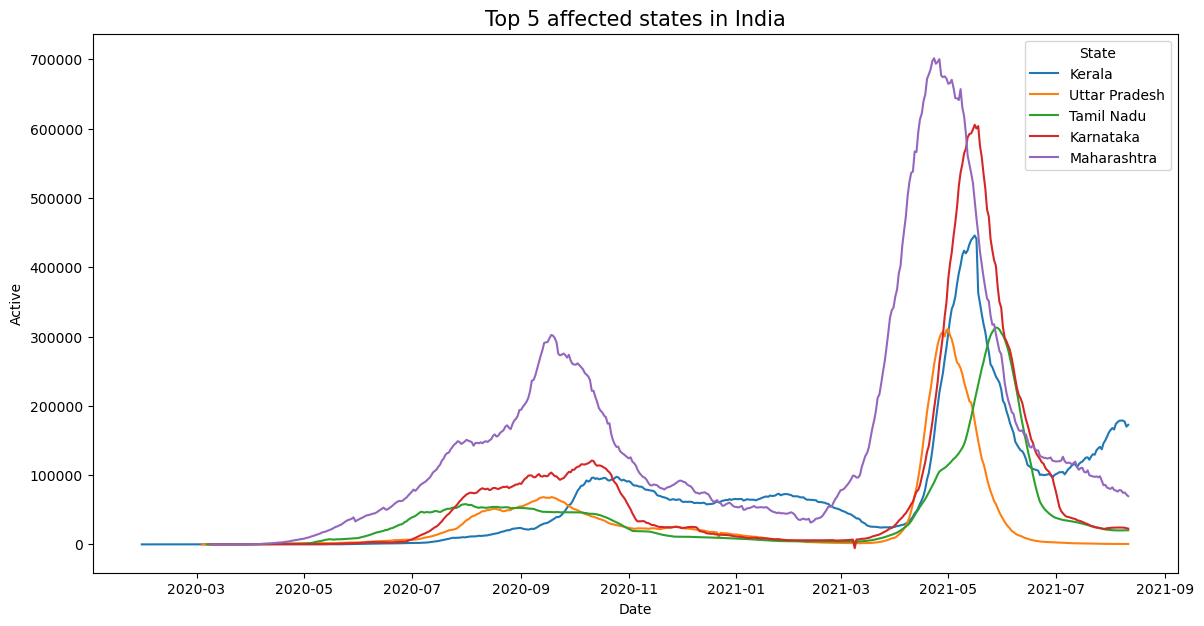

In [34]:
plt.figure(figsize = (14,7))
plt.title('Top 5 affected states in India', size = 15)
sns.lineplot(data = covid_df[covid_df['State'].isin(['Maharashtra', 'Karnataka', 'Kerala', 'Tamil Nadu', 'Uttar Pradesh'])], x = 'Date', y = 'Active', hue = 'State')
plt.show()

#### Load the second dataset

In [35]:
vaccine_df = pd.read_csv('covid_vaccine_statewise.csv')
vaccine_df.head()

,Updated On,State,Total Doses Administered,Sessions,Sites,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),Transgender (Doses Administered),...,18-44 Years (Doses Administered),45-60 Years (Doses Administered),60+ Years (Doses Administered),18-44 Years(Individuals Vaccinated),45-60 Years(Individuals Vaccinated),60+ Years(Individuals Vaccinated),Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Individuals Vaccinated
0,16/01/2021,India,48276.0,3455.0,2957.0,48276.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,23757.0,24517.0,2.0,48276.0
1,17/01/2021,India,58604.0,8532.0,4954.0,58604.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,27348.0,31252.0,4.0,58604.0
2,18/01/2021,India,99449.0,13611.0,6583.0,99449.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,41361.0,58083.0,5.0,99449.0
3,19/01/2021,India,195525.0,17855.0,7951.0,195525.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,81901.0,113613.0,11.0,195525.0
4,20/01/2021,India,251280.0,25472.0,10504.0,251280.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,98111.0,153145.0,24.0,251280.0


#### Drop unnecessary columns

In [36]:
vaccine = vaccine_df.drop(columns = ['Sputnik V (Doses Administered)', 'AEFI', '18-44 Years (Doses Administered)', '45-60 Years (Doses Administered)', '60+ Years (Doses Administered)'], axis = 1)

#### Rename 'Updated On' and 'Total Individuals Vaccinated' columns

In [37]:
vaccine_df.rename(columns={'Updated On': 'Vaccine Date', 'Total Individuals Vaccinated': 'Total'}, inplace=True)

#### Calculates the total number of individuals vaccinated (Male and Female)

In [38]:
Male = vaccine['Male(Individuals Vaccinated)'].sum()
Female = vaccine['Female(Individuals Vaccinated)'].sum()

#### 4. Create a pie chart, representing the total number of vaccinated males and females, respectively

In [39]:
px.pie(values = [Male,Female], names = ['Male','Female'], title = 'Male vs Female Vaccinated')

#### Filter vaccine data by excluding rows that contain 'India' in the 'State' column

In [40]:
vaccine = vaccine_df[vaccine_df.State != 'India']

#### Calculate the top 5 states with the highest total vaccinations

In [41]:
max = vaccine.groupby(by = 'State')['Total'].sum().to_frame('Total')
max = max.sort_values('Total', ascending = False)[:5]

#### 5. Creates a bar plot to visualize the top 5 states in India with the highest total vaccinations

<Axes: title={'center': 'Top 5 vaccinated states in India'}, xlabel='State', ylabel='Total'>

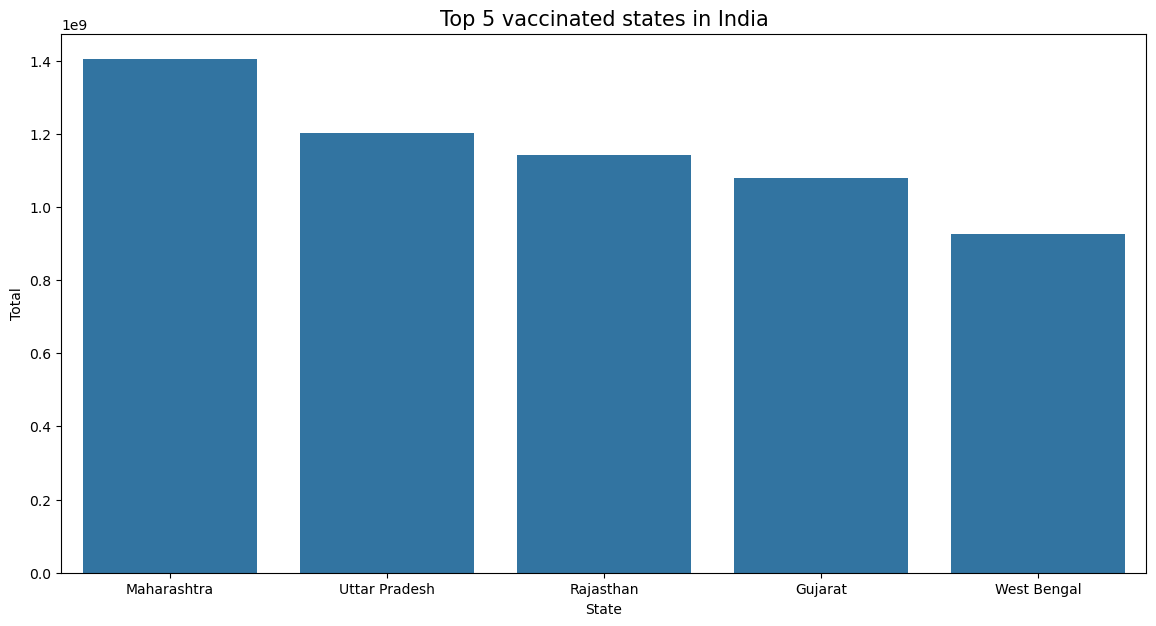

In [42]:
plt.figure(figsize = (14,7))
plt.title('Top 5 vaccinated states in India', size = 15)
sns.barplot(data = max.iloc[:5], x = max.index, y = max.Total)

#### Calculate the bottom 5 states with the lowest total vaccinations

In [43]:
min = vaccine.groupby(by = 'State')['Total'].sum().to_frame('Total')
min = min.sort_values('Total', ascending = True)[:5]
min = min.sort_values('Total', ascending =  False)

#### 6. Creates a bar plot to visualize the bottom 5 states in India with the lowest total vaccinations

<Axes: title={'center': 'Least 5 vaccinated states in India'}, xlabel='State', ylabel='Total'>

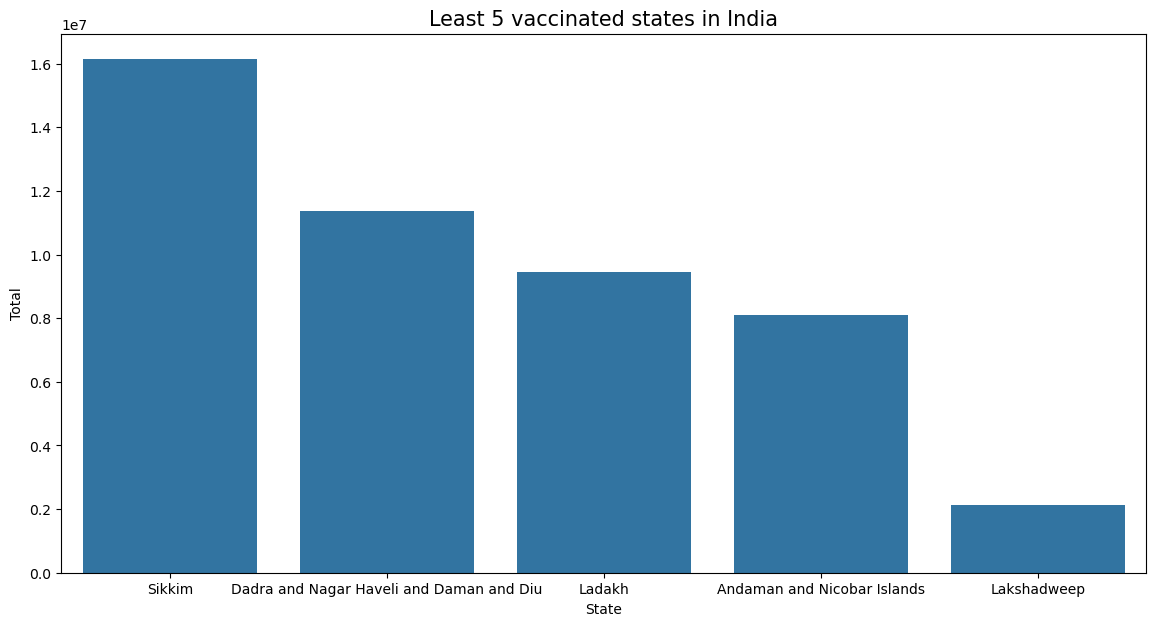

In [44]:
plt.figure(figsize = (14,7))
plt.title('Least 5 vaccinated states in India', size = 15)
sns.barplot(data = min.iloc[:5], x = min.index, y = min.Total)